In [1]:
# Gravitational Lensing Research
# Program to plot kappa vs. radius, with +/- 1-sigma bands, generated in 'Kappa band calculator' notebook.


In [62]:
import time
import matplotlib.pyplot as plt
import matplotlib
import sys
import numpy as np
import os
import timeit
from IPython.core.debugger import set_trace
import datetime

In [3]:
# The current working directory should be the "chains_..." subdirectory for the run of interest.
print(os.getcwd())

/Users/kevin/CloudStation/KEVIN/UCI/Research/gravlensing/Python


In [47]:
title_name = 'A2537' # This is plot title
# Enter a list for each of names, suffixes, legend_names, kpc_per_arcsec.
names = ['A2537', 'A2537']
suffixes = ['.cnfw.v9', '.cc.v9']
legend_names = ['cNFW', 'Corecusp']
kpc_per_arcsec = [4.39, 4.39]
labels = [nm + suf for (nm, suf) in zip(names, suffixes)]
# basepath = '/home/kea/KEVIN/UCI/Research/gravlensing/' 
basepath = '/Users/kevin/CloudStation/KEVIN/UCI/Research/gravlensing/'
long_fns = [basepath + nm + '/chains_' + lab + '/' + lab + '.bands.npz' for nm, lab in zip(names, labels)]

rad_list = []
lower_line = []
upper_line = []
median_line = []
label_list = []
for fn, lab, kpc2as in zip(long_fns, labels, kpc_per_arcsec):
    if os.path.isfile(fn):
        print('Found ', fn)
        f_arrays = np.load(fn)
        rad_list.append(f_arrays['arr_0'] * kpc2as)
        lower_line.append(f_arrays['arr_1'])
        upper_line.append(f_arrays['arr_2'])
        median_line.append(f_arrays['arr_3'])
        label_list.append(lab)
    else:
        print('File NOT found: ', fn)
        sys.exit()

Found  /Users/kevin/CloudStation/KEVIN/UCI/Research/gravlensing/A2537/chains_A2537.cnfw.v9/A2537.cnfw.v9.bands.npz
Found  /Users/kevin/CloudStation/KEVIN/UCI/Research/gravlensing/A2537/chains_A2537.cc.v9/A2537.cc.v9.bands.npz


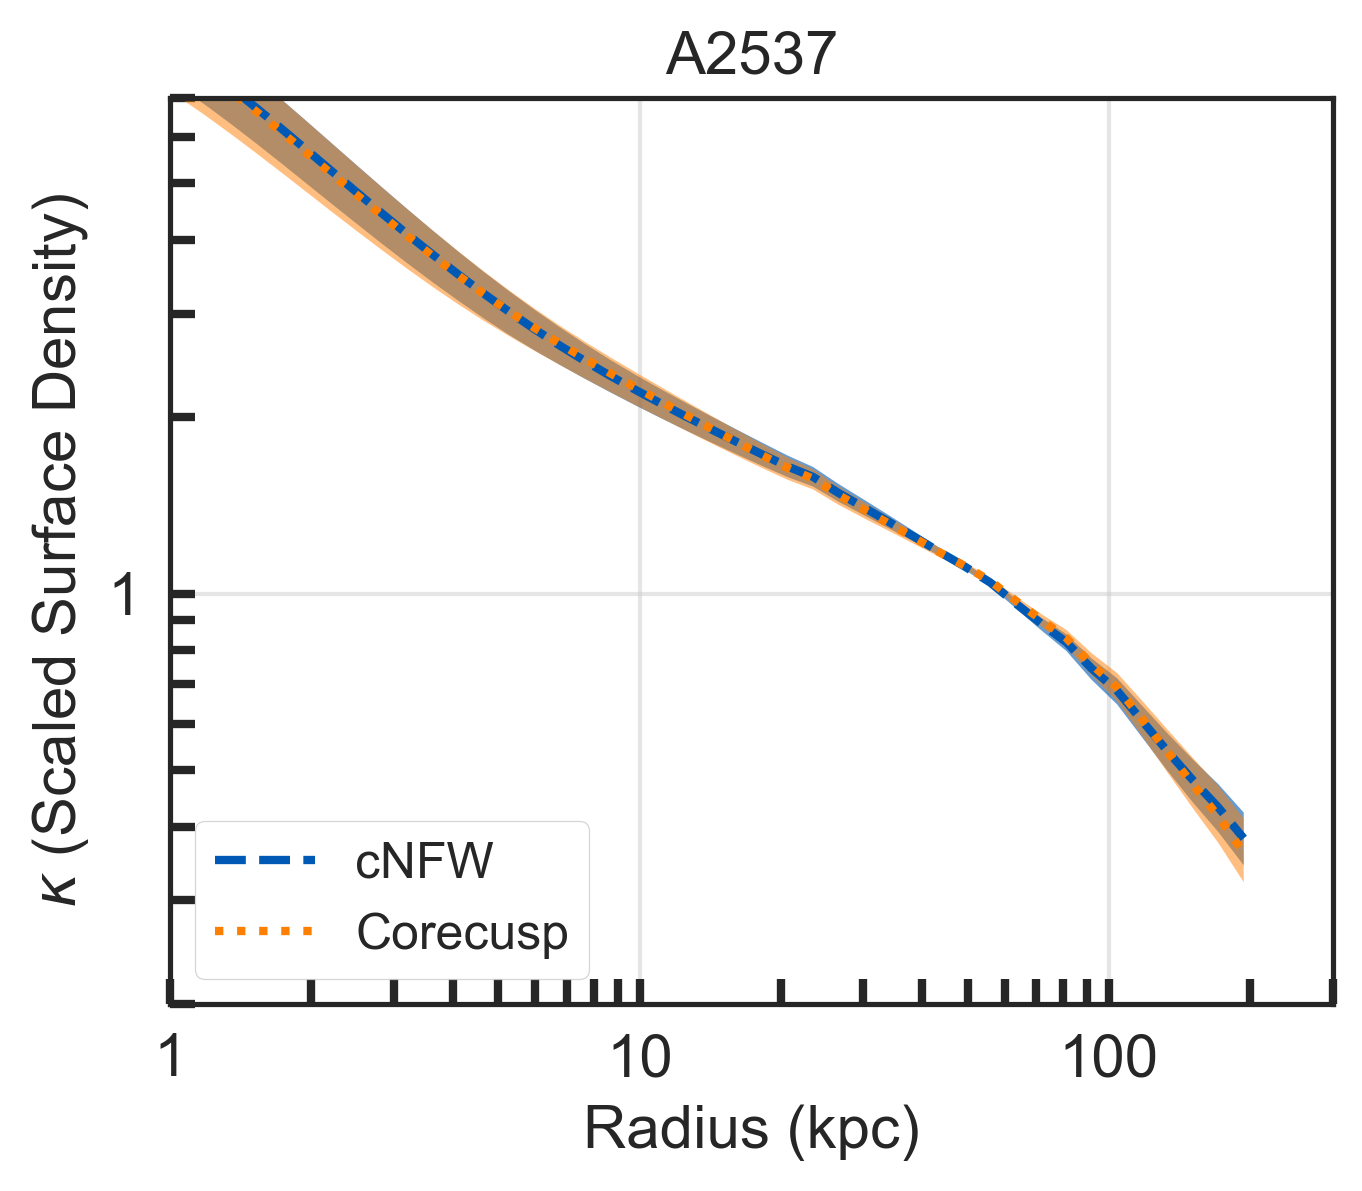

In [65]:
# Plot the kappa profiles all on the same plot.
plt.rcParams["figure.dpi"] = 300
# plt.rcParams["figure.figsize"] = [8.3, 6]
plt.rcParams.update({'legend.fontsize': 'large',
          'figure.figsize': (5, 4),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large',
          'legend.frameon': True })

plt.style.use('seaborn-ticks')
fig = plt.figure(1)
ax = fig.add_subplot(1, 1, 1)

ax.grid(which='major', alpha=0.5)
# ax.axis('equal')
plt.figure(num=1, figsize=(11, 8)) 

styles = ['--', ':', '', '-.']
colors = ['#005AB5', '#ff7f00']
alphas = [0.6, 0.5]
for rad, sm, sp, med, lab, style, leg, color, alpha in zip(rad_list, lower_line, upper_line, median_line,\
        label_list, styles, legend_names, colors, alphas):

    ax.fill_between(rad, sm, sp, where= sp >= sm, facecolor=color, alpha=alpha,\
                interpolate=True) 
    ax.loglog(rad, med, label=leg, linewidth=2, linestyle=style, color = color)   


ax.set_title(title_name)
ax.tick_params(direction='in', length=6, width=2, axis='both', which='both')
ax.set_xlabel( 'Radius (kpc)' )
ax.set_ylabel( r'$\kappa$ (Scaled Surface Density)' )
ax.set_yticks([1])
ax.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
# ax.set_title('cNFW Model')
ax.set_autoscaley_on(False)
ax.set_ylim(.2, 7)
ax.set_xlim(1, 300)
ax.legend(frameon=True, loc='lower left')
# manually handle ordering of legend
handles, labels = plt.gca().get_legend_handles_labels()
order2 = [0,2,1]
# plt.legend([handles[idx2] for idx2 in order2],[labels[idx2] for idx2 in order2])
# ax.axvspan(7, 28, alpha=0.3, color='red')
# ax.annotate('image locations', xy=(10, .65), xytext=(2.,.65), arrowprops={'arrowstyle': '-'}\
#             , va='center')
plt.show()

In [ ]:
sys.exit()

In [ ]:
fig.savefig('../<name here>_kappadistplot.png', dpi=None, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format='png',
        transparent=False, bbox_inches=None, pad_inches=0.1,
        frameon=None)